# 泰坦尼克号生还数据分析——以年龄层次为例

# 1. 读入数据

In [1]:
import numpy as np #导入库
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
titanic = pd.read_csv("D:/Documents/dataset/titanic/train.csv")

In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 2. 研究目的

## a. 了解乘客的信息
## b. 分析乘客信息与生还的关系

# 3. 数据清洗

## 3.1. 缺失值分析

In [5]:
titanic.isnull().sum()  # 查看缺失值

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### 结论：Age、Cabin存在缺失值

## 3.2 乘客年龄缺失值填补和分布可视化

### 未处理Age缺失值的分布

In [6]:
sns.set(style="darkgrid", palette="muted", color_codes=True) 

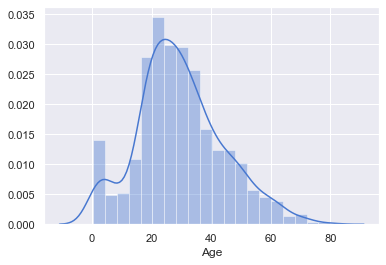

In [7]:
sns.distplot(titanic[titanic['Age'].notnull()]['Age']) #distplot函数查看乘客的年龄分布

### 处理Age缺失值后的分布

In [8]:
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].mean()) # 用平均年龄对缺失值进行填补

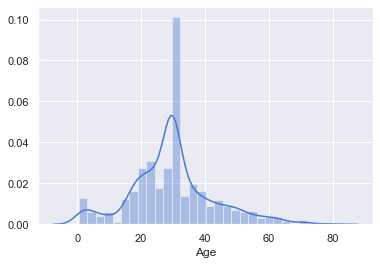

In [9]:
sns.distplot(titanic['Age'])

## 3.2 登船地点(Embarked)缺失值填补与可视化

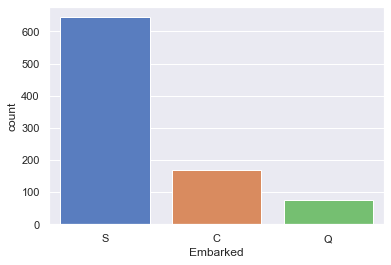

In [10]:
sns.countplot(x="Embarked",data=titanic) #绘制类别计数柱状图

In [11]:
titanic['Embarked'] = titanic['Embarked'].fillna('S') # 缺失的登船地点以南安普顿S填补

In [12]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

### Cabin是座舱号，这个变量可以不要

# 4. 数据探索

### 性别可视化，男性乘客多于女性乘客

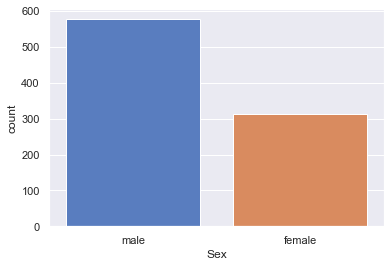

In [13]:
sns.countplot(x="Sex",data=titanic)

### 箱型图，男女乘客年龄分布接近，女性乘客年龄分布较松散，男性乘客高龄的较多

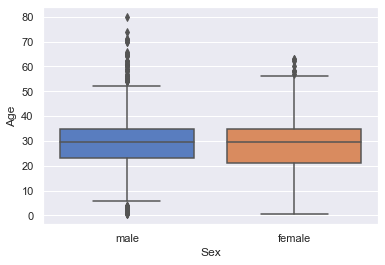

In [14]:
sns.boxplot(x='Sex',y='Age',data=titanic)

### 用柱状图对船舱等级计数，第3级船舱乘客数量最多

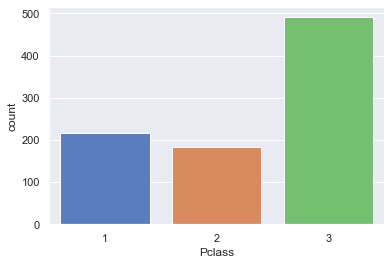

In [15]:
sns.countplot(x="Pclass",data=titanic)

### 用箱型图或小提琴图对船舱等级和乘客年龄联合计数
### 头等舱平均年龄最大，三等舱年龄分布最集中，但极端值最多。

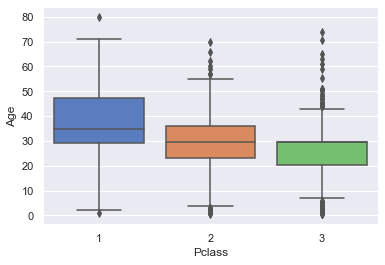

In [16]:
sns.boxplot(x="Pclass", y="Age", data=titanic)

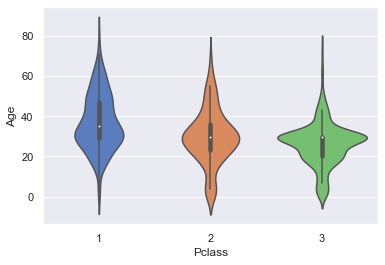

In [17]:
sns.violinplot(x="Pclass", y="Age", data=titanic)

### 对生还的乘客计数, 0 = 死亡，1 = 生还

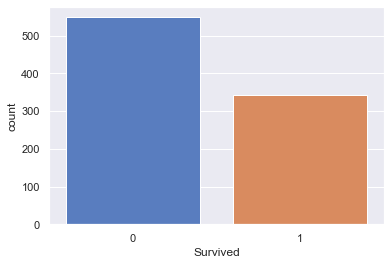

In [18]:
sns.countplot(x="Survived",data=titanic,)

### 按性别对生还的乘客计数, 0 = 死亡，1 = 生还
### 结果显示生还者中女性占大多数

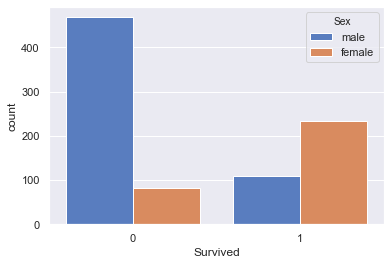

In [19]:
sns.countplot(x='Survived',hue='Sex',data=titanic)

### 对年龄分级，16岁以下未成年，60岁以上老人
### 中年人乘客数量占比很大，小孩和年长者占比很小

In [20]:
def agelevel(Age):
    if Age <= 16:
        return 'child'
    elif Age >= 60:
        return 'aged'
    else:
        return 'midlife'

In [21]:
titanic['age_level'] = titanic['Age'].map(agelevel)

In [22]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_level
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,midlife
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,midlife
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,midlife
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,midlife
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,midlife


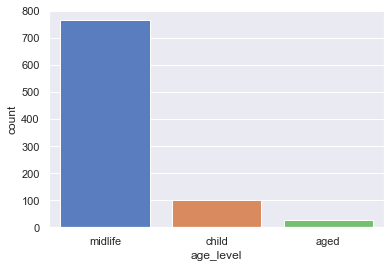

In [23]:
sns.countplot(x='age_level',data=titanic)

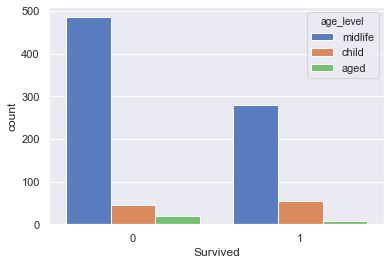

In [24]:
sns.countplot(x='Survived',hue='age_level',data=titanic)

### 利用网格绘图
### 儿童年龄段：一等舱生还比例较高，二等舱生还比例较低，三等舱生还比例较低（三等舱未生还人数最多）
### 成人年龄段：
### 老人年龄段：

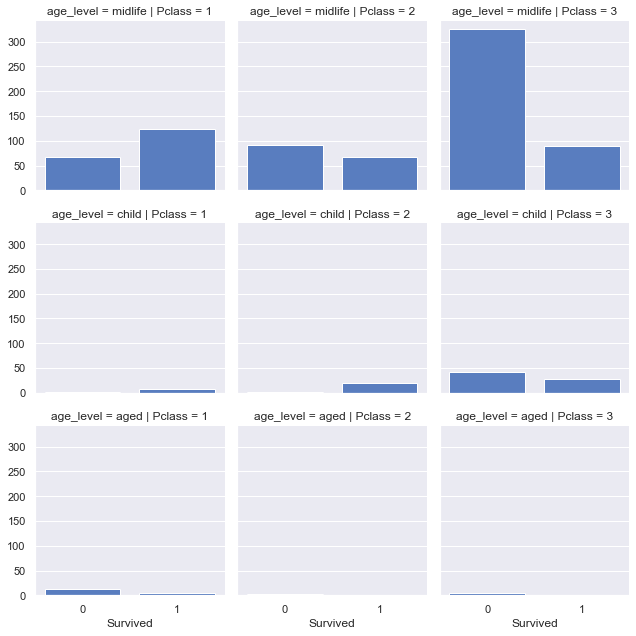

In [25]:
g = sns.FacetGrid(titanic, col='Pclass', row='age_level') #网格
g.map(sns.countplot, 'Survived', order = (0,1))
